# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df = df.drop('Id', axis=1)


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here
missing = df.isnull().sum().reset_index()
missing.columns = ['Column','Missing values']
missing = missing.loc[missing['Missing values']>0]
missing['pct'] = missing['Missing values'] *100/len(df)
missing
missing_above20 = missing.loc[missing['pct']>20]
missing_above20




,Column,Missing values,pct
5,Alley,1369,93.767123
56,FireplaceQu,690,47.260274
71,PoolQC,1453,99.520548
72,Fence,1179,80.753425
73,MiscFeature,1406,96.301370


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# your code here

df = df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [6]:
df.shape


(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

180921.19589041095
0    140000
dtype: int64


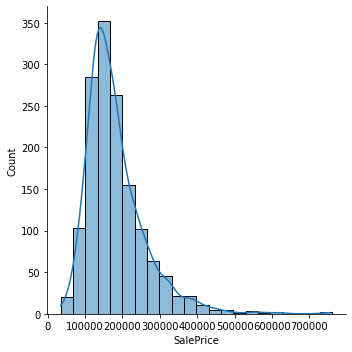

In [7]:
# your code here

SP_mean = df['SalePrice'].mean()
SP_mode = df['SalePrice'].mode()
print(SP_mean)
print(SP_mode)
sns.displot(df['SalePrice'], kde=True, binwidth=33000, bins=10)


In [8]:
# your comment here
'''The distribution is right skewedmeaning that the distribution is not even
the mean on the sales prices is located on the right side of the mode (higher)

'''

'The distribution is right skewedmeaning that the distribution is not even\nthe mean on the sales prices is located on the right side of the mode (higher)\n\n'

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the right. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

In [9]:
# your code here

#Note for me: 
#skew is the degree of distortion from a normal distribution.
#Why do we care if the data is skewed? the model will be trained on a much 
#larger number of moderately priced homes, and will be less likely 
#to successfully predict the price for the most expensive houses.
# basically: it may impair the interpretation of feature importance

#first, let's check describe. this shows us if there are outliers
df['SalePrice'].describe()




count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [24]:
#Square root transformation
#but based on the Shapiro-Wilks test 
#For this we specify:
#H0:the data is a sample from a normal distribution, 
#H1:the data is a sample from a skewed distribution 

from scipy.stats import shapiro
resp = df.SalePrice
p = shapiro(resp)[1]
print(p)

# #this can also be calculated by:

print(f"skew of salePrice: {df['SalePrice'].skew()} is skewed if under -1 or above 1")
sqrt_resp =resp**0.5
log_resp = np.log(resp)
print(f'the square root of salePrice: {sqrt_resp.skew()} is symetric if close to 0 \nusing log{log_resp.skew()}')
#so from this I see that the log seems to normalize the data (closest to 0)

3.206247534576162e-33
skew of salePrice: 1.8828757597682129 is skewed if under -1 or above 1
the square root of salePrice: 0.9431527373310963 is symetric if close to 0 
using log0.12133506220520406


In [25]:
df['SalePriceAdjusted'] = resp.apply(np.log)

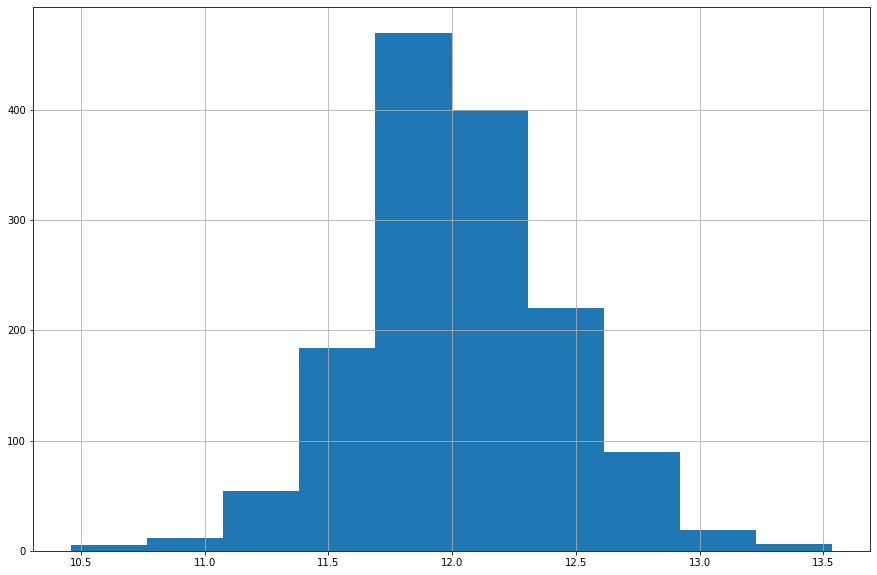

In [26]:
#Let's plot it
plt.figure(figsize=(15,10))
df['SalePriceAdjusted'].hist()

plt.show()

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

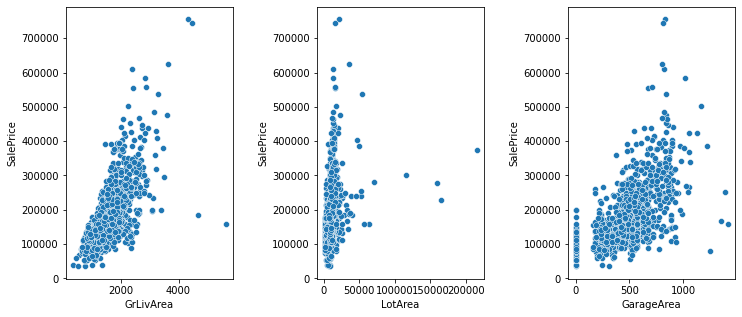

In [40]:
# your code here
# add cells as needed
Size_measures = ['GrLivArea', 'LotArea', 'GarageArea']
y = 'SalePrice'

fig, ax = plt.subplots(1,3,figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)#wspace is the space between the graphs

for a, b in enumerate(Size_measures):
    plt.sca(ax[a])
    ax[a] = sns.scatterplot(x = df[b], y=df[y])
#Here I see that the Living area seems to have a more direct influence than lot area 
# or garage. If I had to rank them it would be something like:
#1-Livig area
#2-Garage
#3-Lot Area
#If I was going to buy a house, I think I would also think that the Living area would be most important
#(also becaus I don't have many cars), but I think in the US this might be an important criteria

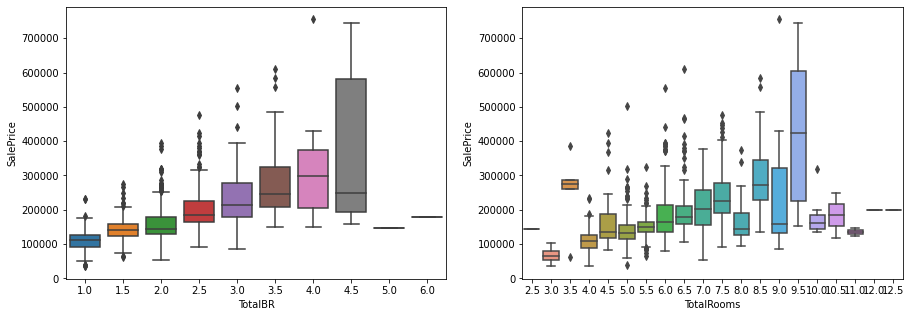

In [49]:
rooms = ['BedroomAbvGr', 'KitchenAbvGr', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
df.columns
#Following the advice above let's add the total number of bathrooms and 
#total number of rooms and plot them agains salesPrice

df['TotalBR'] = df['FullBath']+ df['BsmtFullBath']+ (df['HalfBath']/2)+(df['BsmtHalfBath']/2)
df['TotalBR']#Some give me ,5 which seems odd (even though it only refers to 1/2 bath...)

df['TotalRooms']= df['BedroomAbvGr']+df['KitchenAbvGr']+df['TotalBR']
df['TotalRooms']
parameters = ['TotalBR','TotalRooms']
y = 'SalePrice'

fig, ax = plt.subplots(1,2,figsize=(15, 5))
plt.subplots_adjust()

for a, b in enumerate(parameters):
    plt.sca(ax[a])
    ax[a] = sns.boxplot(x = df[b], y=df[y])
    
#Here I see that when it comes to Bathrooms, there is a clear limit at 4,5 for which the price stops to increase
#I also see that the median (2nd qtl) seems to me low for this category (4 1/2 bathrooms) -higher median for houses 
#with 4 bathrooms haha. Some outliers in all other categories which could also mean that bathrooms are perhaps
#not driving the price as it seems.

#Concerning Total rooms, I see that the limit seems to be at 9.5 rooms and it is quite curious to see that
#the median at 9 vs 9.5 rooms is SO different.

#In general:
#I see that the bathrooms seem to have an influence in the price until a certsin amount. (this also could 
#be linked to the size of the house: bigger house, more bathrooms, higher price?)
# If I look at ranges and median I see also an influence on total rooms (with some exception: 8 ad 9.5 rooms)
#for 9.5 I see below that it is due to the low amount of houses with the criteria fulfilled.
#MAny outliers in both cases perhaps there are other factors influencing the sales price in those cases.


In [57]:
# I am checking the above (Total rooms at 9and 9.5)
df.loc[df['TotalRooms']==9.5] #one of the reasons seem to be the amount of houses at 9.5 is low so less data 
#I could have done a bar plot of this, but I like that there is more info on a box plot (min/max and median - alsi easier to spot outliers)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,TotalBR,TotalRooms
769,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,...,0,0,6,2010,WD,Normal,538000,13.195614,4.5,9.5
1031,75,RL,102.0,15863,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,8,2009,WD,Normal,197000,12.190959,3.5,9.5
1032,60,RL,NaN,14541,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,11,2006,WD,Abnorml,310000,12.644328,3.5,9.5
1068,160,RM,42.0,3964,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,6,2006,WD,Normal,151400,11.927681,3.5,9.5
1169,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,7,2006,WD,Normal,625000,13.345507,4.5,9.5
1182,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,555,0,7,2007,WD,Abnorml,745000,13.521139,4.5,9.5


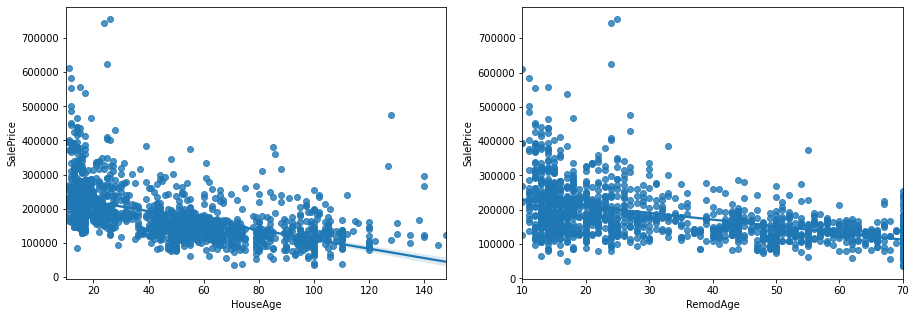

In [80]:
#How long the house has been built or remodeled (YearBuilt and YearRemodAdd).
#For this I'm not sure if I should calculate it based on this current year of based on the year it was sold.
# For the purpose of this excercice, I will calculate it to today (2020)
df[['YearBuilt','YearRemodAdd']]
df['HouseAge'] = 2020 - df['YearBuilt']
df['RemodAge'] = 2020 - df['YearRemodAdd']

years = ['HouseAge','RemodAge']
y = 'SalePrice'

fig, ax = plt.subplots(1,2,figsize=(15, 5))
plt.subplots_adjust()

for a, b in enumerate(years):
    plt.sca(ax[a])
    ax[a] = sns.regplot(x= df[b], y=df[y],fit_reg =True)

#hm, I'm not sure what to think about this. It looks like a negative relation in both graphs here: 
#The older the house, and the further the year of remodelation, the lower the sales price.
#Well I guess it kind of makes sense if the houses in the US are newer... I don't think it would be the same 
#about house in Europe


25


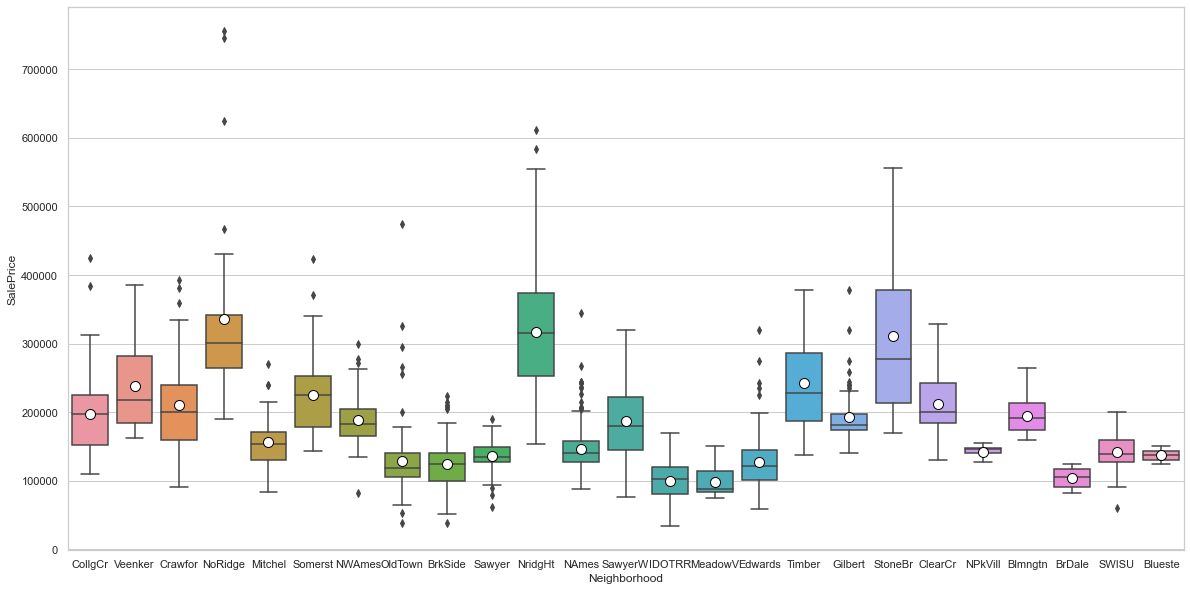

In [120]:
#Neighborhood of the house (Neighborhood).
Neighborhoods = df['Neighborhood'].unique()
print(len(Neighborhoods))
y = 'SalePrice'
# Tried bar plot but didn't managed
# plt.figure(figsize=(15, 8))
# plt.xlabel("Neighborhood")
# plt.ylabel("Sale Price")
# plt.xticks(25, df['Neighborhood'], rotation=90)
# plt.bar(25, df['SalePrice'])
# plt.show()

plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df['Neighborhood'], y=df[y], showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

#From this graph I can see that there are 3 neighborhoods that stand out:
# 1- NoRidge : although it has a lower size whisker, I see a few outliers above 700000 also making the average go higher
# 2- NridgHt : average a bt lower that NoRidge but 3rd quartile and max around 600000
# 3- StoneBr : average aroud the sae as #2 and max between 500000 and 700000


## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

<AxesSubplot:>

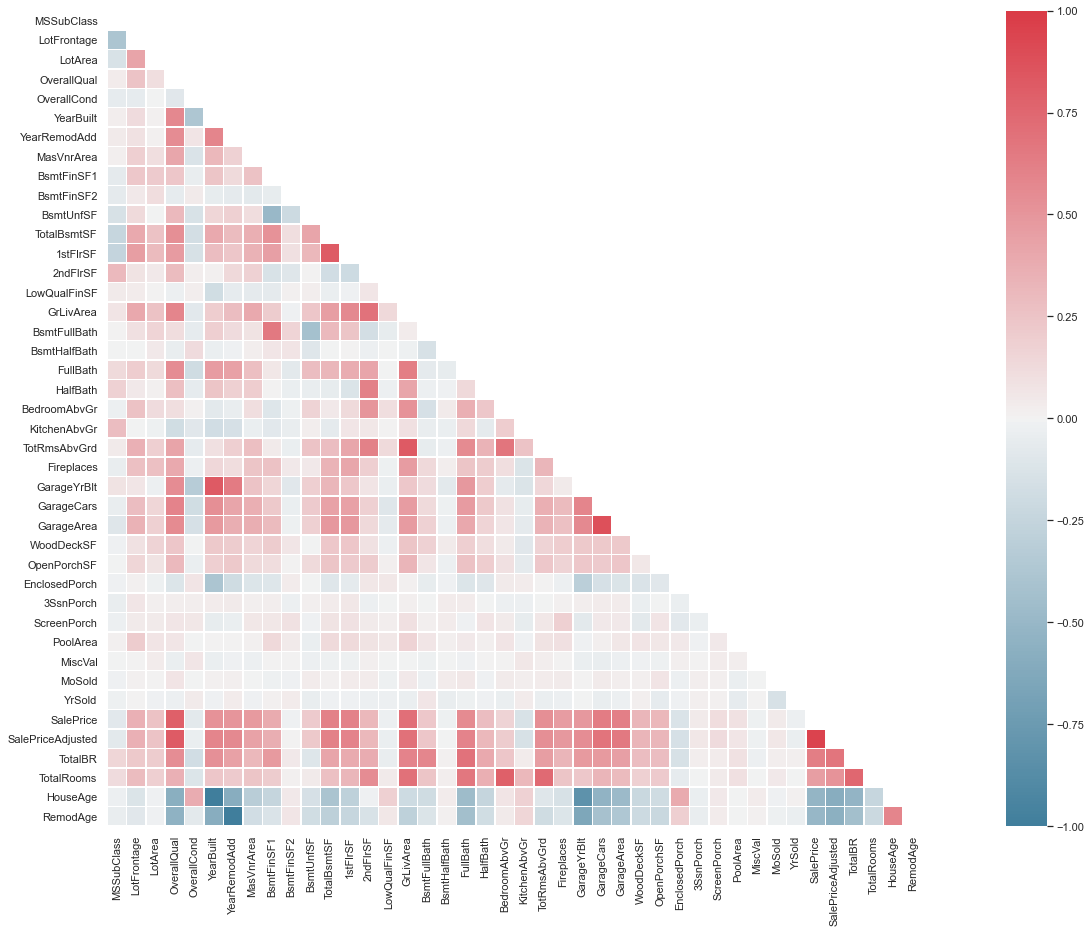

In [166]:
# your code here
from string import ascii_letters

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1,cmap=cmap, 
            square=True, linewidths=.5)

In [164]:
#Method2: Ok, this one is weird, I don't really understand how to 'tune' k.

sol = (corr.where(np.triu(np.ones(corr.shape),k=-30).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol['SalePrice']

<AxesSubplot:>

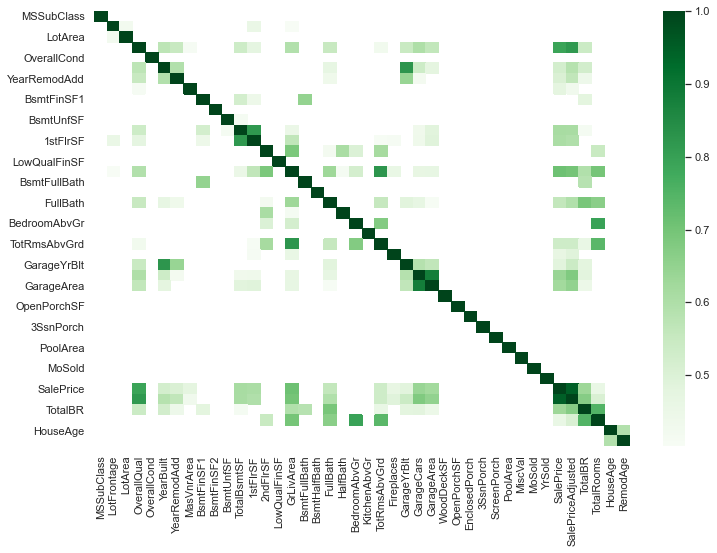

In [145]:
#Method3:
kot = corr[corr >=.4]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [163]:
#Method1 to take out the highest correlations and print thse for the variable we need. 
#this looks like the best option!
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print (so['SalePrice'][-8:])
#since Garage Area and Garage cars are quite the same (in a way) then I'll take garage area

TotalBsmtSF          0.613581
GarageArea           0.623431
TotalBR              0.631731
GarageCars           0.640409
GrLivArea            0.708624
OverallQual          0.790982
SalePriceAdjusted    0.948374
SalePrice            1.000000
dtype: float64


In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [13]:
# your comment here
# To the sales price I see that the following are positively correlated:
# -OverallQual
# -TotalBsmtSF
# -1stFlrSF
# -GrLivArea
# -FullBath
# -TotRmsabvGr
# -GarageCars
# -GarageArea

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [14]:
# your responses here
# add cells as needed

### 1 Overall Quality (corr=0,79)

The correlation between the factors is positive and quite high. This could mean that people buying a house in 
the US seem to be interested in the overall quality of the house, and ar willing to pay a higher price for a higher quality.
Now, what determines a high quality ? This is unfortunately not indicated by the data, but we can only guess that it is the sum of the other factors highly correlated.

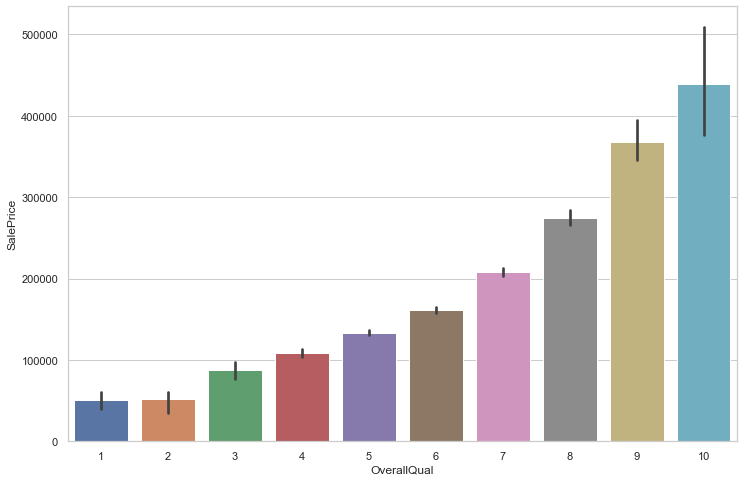

In [199]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = df['OverallQual'], y=df['SalePrice'])

### 2 Ground Living Area (corr=0.708624)

As for the Overll Quality, the correlation between ground living area and saleprice is positive and high.
This means that the people interested in buying a house, will be willing to pay more for a more 'spacious' living area. This does come as a surprise: bigger houses, bigger prices (ofcourse, I believe other factors also influence this such as perhaps neighborhoods)

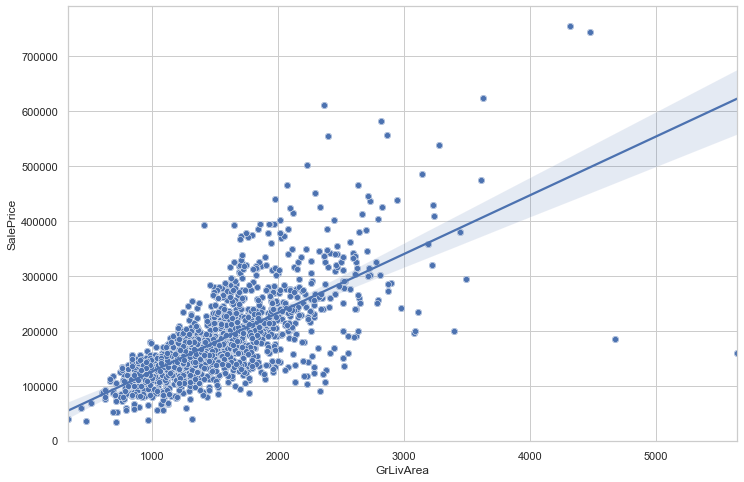

In [200]:
plt.figure(figsize=(12, 8))
ax = sns.regplot(x = df['GrLivArea'], y=df['SalePrice'])
ax1 = sns.scatterplot(x = df['GrLivArea'], y=df['SalePrice'])

### 3 Total amount of Bathrooms (corr=0.631731)
Not so far from preferring a bigger living area, people in the US (that are interested in buying a house) seem to prefer houses with higher amount of Bathrooms. Now, a Bahroom can be 'full' or 'half. This total includes both(hence the weird 0.5 ...) So, Based on the correlation coefficient for this, I believe that the price of a house is also driven by the total amount of bedrooms, up to a certain point: this criteria doesn't seem to affect the price above 4bathrooms and half

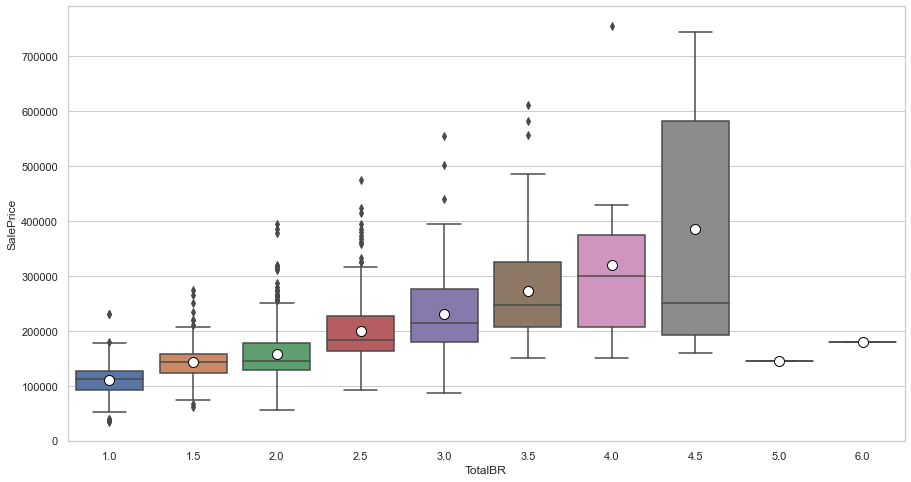

In [176]:
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df['TotalBR'], y=df['SalePrice'], showmeans=True,
                 meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})
#the means are also displayed.

### 4 Garage area (corr=0.623431)
Garage area as well as garage cars (amount of cars that can fit in the garage I guess) have quite the same correlation therefore only one is necessary for this study.
In a nutshell, the people interested in buying a house, seem to be mindful of the garage area. we could think this is due to the central role the car has in a household in the US, but it can also be due to storage possibilities? haha One can only wonder here, but this is a criteria that seems to have a direct effect in the price of a house.

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

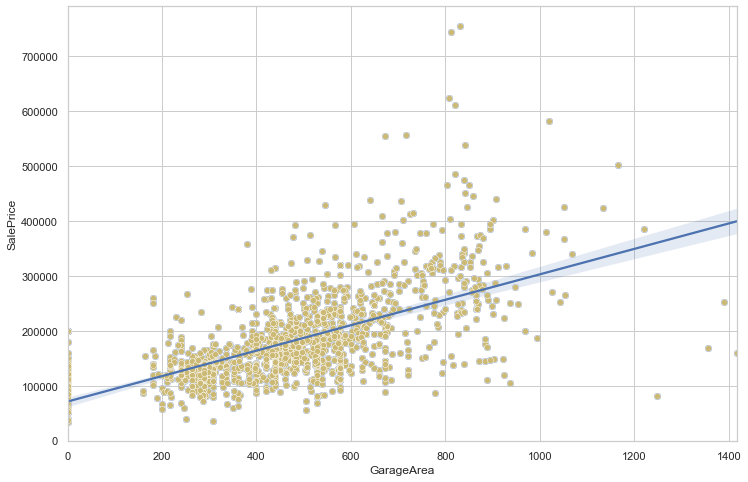

In [201]:
plt.figure(figsize=(12, 8))
sns.regplot(x=df['GarageArea'], y=df['SalePrice'])
sns.scatterplot(x=df['GarageArea'], y=df['SalePrice'], color='y')

### 5 Total Basement Surface in squarefeet (?!) (corr=0.613581)

And finally, the Basement! what can I say, households seem to be needing that extra space in the basement that can become from a man/woman's cave to a perfect laundry room, games room or xtra space for the kids haha
I any case, people interested in buying a house seem to be keen on paying a bit extra (or a lot extra?) to have a (bigger) basement area UP TO A CERTAIN POINT that point being 2000sqtF, as the correlation suggests

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

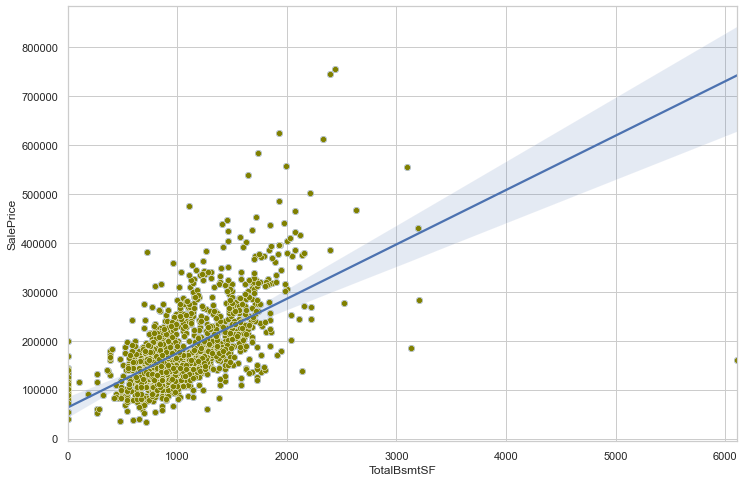

In [202]:
plt.figure(figsize=(12, 8))
sns.regplot(x=df['TotalBsmtSF'], y=df['SalePrice'])
sns.scatterplot(x=df['TotalBsmtSF'], y=df['SalePrice'], color='olive')